In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts 

In [2]:
dataset = pd.read_csv("Churn.csv", sep=";")

dataset.head()


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
dataset.shape

(999, 12)

In [4]:
#vamos dar nomes as colunas
dataset.columns = ["Id", "Score", "Estado", "Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito", "Ativo","Salario","Saiu"]

In [5]:
dataset.head()


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
agrupadogenero = dataset.groupby(['Genero']).size()
agrupadogenero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [7]:
#fazer um filtro para ver somente os os homens
dataset.loc[(dataset['Genero']=="M" )|(dataset['Genero']=="Masculino")]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
5,6,645,SC,Masculino,44,8,11375578,2,1,0,14975671.0,1
6,7,822,RS,M,50,7,0,2,1,1,100628.0,0
8,9,501,RS,Masculino,44,4,14205107,2,0,1,749405.0,0
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7172573.0,0
10,11,528,RS,Masculino,31,6,10201672,2,0,0,8018112.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0


<Axes: xlabel='Genero'>

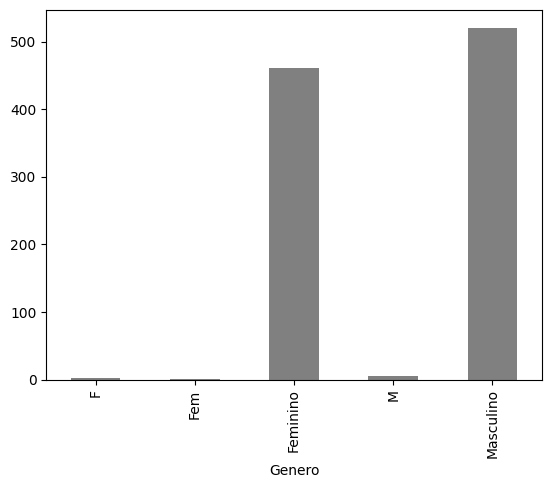

In [8]:
#primeiro gráfico besta
#plot bar é barra de plotagem em inglês
agrupadogenero.plot.bar(color = 'gray')

#vamos ter que tratar os dados diferentes

In [9]:
#vamos explorar os dados de forma categorica
#Olhar os Estados agora
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

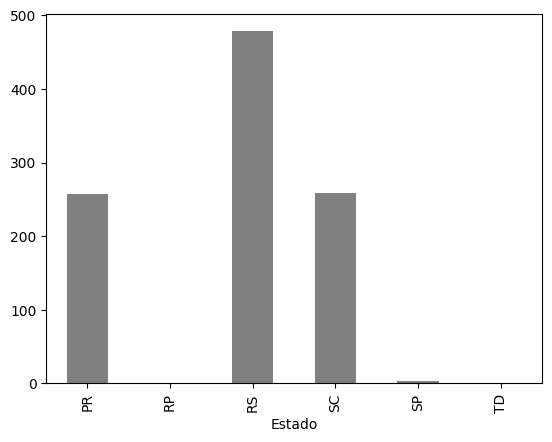

In [10]:
#primeiro gráfico besta
#plot bar é barra de plotagem em inglês
agrupado.plot.bar(color = 'gray')

#Já achamos algumas problemas com SP e TD que não estados do Sul

In [11]:
#entender as colunas numéricas 
dataset['Score'].describe()


count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

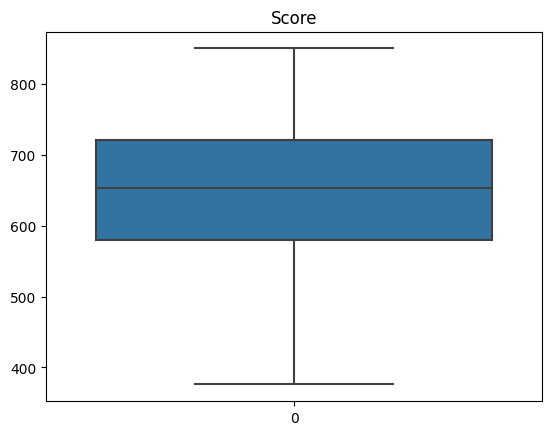

In [12]:
srn.boxplot(dataset['Score']).set_title('Score')

C:\Users\victo\AppData\Local\Temp\ipykernel_33900\4068248596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

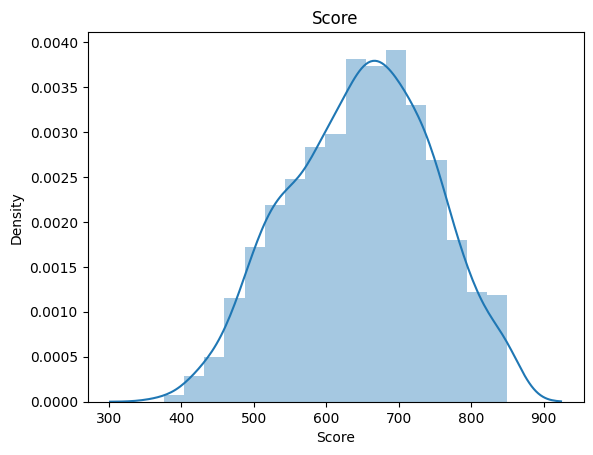

In [13]:
srn.distplot(dataset['Score']).set_title('Score')

In [14]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

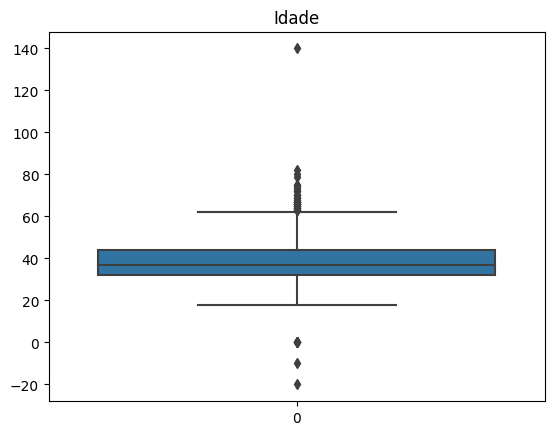

In [15]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

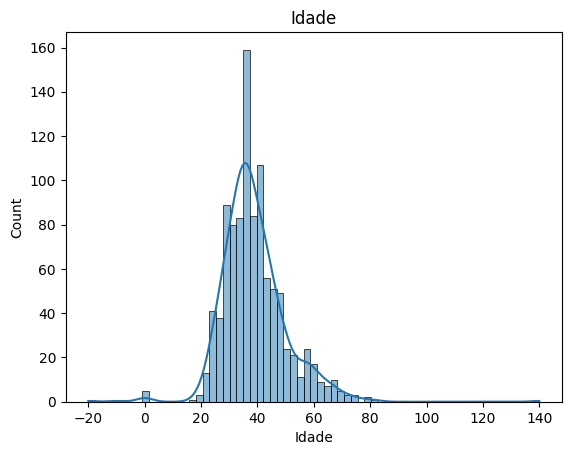

In [16]:
srn.histplot(dataset['Idade'],kde=True).set_title('Idade')

Text(0.5, 1.0, 'Saldo')

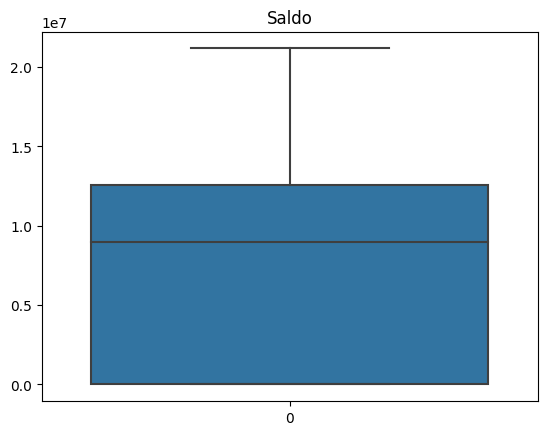

In [17]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

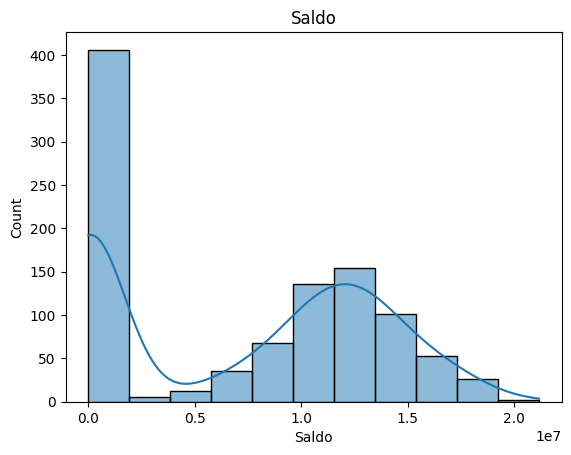

In [18]:
srn.histplot(dataset['Saldo'],kde=True).set_title('Saldo')

In [19]:
print('---------- TRATAMENTO DOS DADOS ----------')

---------- TRATAMENTO DOS DADOS ----------


In [20]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [21]:
#criando a variável que vai receber o valor médio de salário e dps colocando nos Null
medianasalario = sts.median(dataset['Salario'])
dataset['Salario'].fillna(medianasalario,inplace=True)
#checando se está certo
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [22]:
#arrumar os Generos agora
dataset['Genero'].fillna('Masculino',inplace=True)
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [23]:
#Agora vamos padronizar o Genero
dataset.loc[dataset['Genero']=='M','Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem','F']),'Genero']= "Feminino"
#eu localizo e dps passo o parametro de coluna, dps disso tudo, eu informo oque quero colocar

agrupadoG = dataset.groupby(['Genero']).size()
agrupadoG

Genero
Feminino     464
Masculino    535
dtype: int64

In [24]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [25]:
#Filtro com duas condições de idades, menos de 0 e mais de 120
##Notasse a utilização de |

dataset.loc[(dataset['Idade']<0) | (dataset['Idade']>120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [26]:
medianaidade = sts.median(dataset['Idade'])
medianaidade

37

In [27]:
#Criamos a condição para alterar os valores
dataset.loc[(dataset['Idade']<0) | (dataset['Idade']>120),'Idade'] = medianaidade

##Agora dá pra ver claramente a diferença de um filtro para um filtro de mudança de dados
dataset.loc[(dataset['Idade']<0) | (dataset['Idade']>120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [28]:
#Duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [29]:
#vamos excluir os duplicados
dataset.drop_duplicates(subset="Id",keep='first',inplace=True)
#
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [30]:
agrupadoE = dataset.groupby(['Estado']).size()
agrupadoE

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [31]:
#Agrupando os Estados fora do padrão dentro da moda
dataset.loc[dataset['Estado'].isin(['SP','RP','TD']),'Estado'] = 'RS'
dataset.groupby(['Estado']).size()

Estado
PR    257
RS    483
SC    258
dtype: int64

In [32]:
#calculando o desvio padrão, para descobrir os outliers (salarios fora do padrão)
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [33]:
#Descobrir os salarários que estão 2* maior do que o desvio padrão
dataset.loc[dataset['Salario']>=2 * desv ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [34]:
#vamos descobrir a mediana para poder colocar
medianasalario = sts.median(dataset['Salario'])
medianasalario

8637195.5

In [35]:
#vamos atribuir esse valor agora lá dentro da tabela
dataset.loc[dataset['Salario']>=2*desv,'Salario'] = medianasalario

#agora vou checar se existe ainda
dataset.loc[dataset['Salario']>=2 * desv ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [36]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [37]:
dataset.shape

(998, 12)